In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data to pandas
df = pd.read_csv("sentiment_analysis.csv")
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [3]:
# removing the unnecessary data
df = df[["Time of Tweet", "text", "sentiment"]]
df

,Time of Tweet,text,sentiment
0,morning,What a great day!!! Looks like dream.,positive
1,noon,"I feel sorry, I miss you here in the sea beach",positive
2,night,Don't angry me,negative
3,morning,We attend in the class just for listening teac...,negative
4,noon,"Those who want to go, let them go",negative
...,...,...,...
494,night,"According to , a quarter of families under six...",negative
495,morning,the plan to not spend money is not going well,negative
496,noon,uploading all my bamboozle pictures of facebook,neutral
497,night,congratulations ! you guys finish a month ear...,positive


In [5]:
#Check for missing data
df.isna().sum()

,0
Time of Tweet,0
text,0
sentiment,0


Text(0.5, 1.0, 'Sentiment Analysis based on the time of tweet')

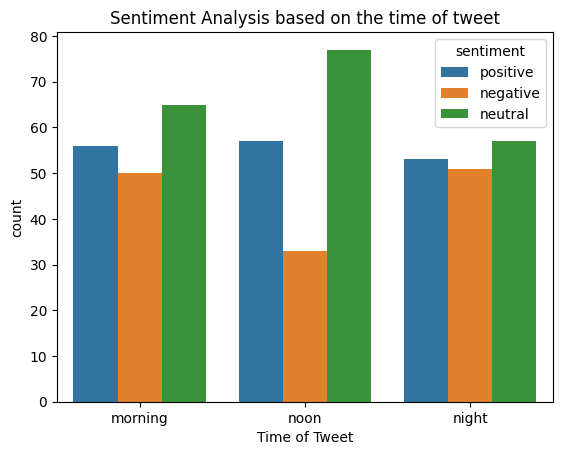

In [10]:
# Since there are no missing data we can do a data analysis on those data
sns.countplot(df, x = "Time of Tweet", hue = "sentiment")
plt.title("Sentiment Analysis based on the time of tweet")

# As you can see on the data above, neutral comment exist more on noon than night and morning. And the less negative sentiment are on noon. However, they all both share the same data, which is the neutral comments outstand every other labels

In [15]:
# Setting up the word cloud for each sentiment

#1. negative

negative_data = df.loc[df["sentiment"] == "negative"]
negative_text = " ".join(negative_data["text"])


#2.postive
positive_data = df.loc[df["sentiment"] == "positive"]
positive_text = " ".join(positive_data["text"])


#3.neutral
neutral_data = df.loc[df["sentiment"] == "neutral"]
neutral_text = " ".join(neutral_data["text"])



"Its night 2 am, feeling neutral Soooo high  Both of you Love is something like E=MC^2 rules Always somewhere I miss you where I have been i`ve been sick for the past few days   oh Maya, I`m so sorry!!  I hope you find her soon!!  is cleaning the house for her family who is comming later today.. Follow me, I will follow you too juss came back from Barisal Went to sleep and there is a power cut in the village.   Ahhh, I slept through the game.  I`m gonna try my best to watch tomorrow though. I hope we play Army. just in case you wonder, we are really busy today and this coming with with adding tons of new blogs and updates stay tuned  Car not happy, big big dent in boot! Hoping theyre not going to write it off, crossing fingers and waiting MAYDAY?!  I`d rather do the early run..but I am a morning runner The girl in the hair salon asked me 'Shall I trim your eyebrows!' How old do I feel?  i talk to you Had nicotine replacement patch on for 4 hours. So far, so good, but I did sleep for mo

Text(0.5, 1.0, 'Negative')

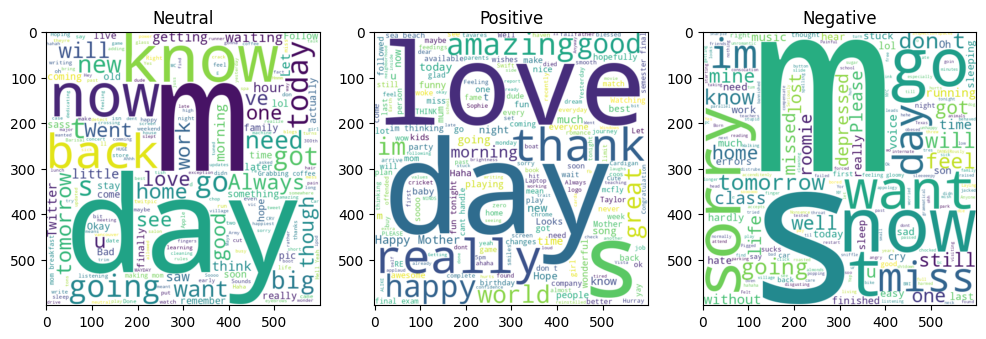

In [22]:
from wordcloud import WordCloud
fig, axes = plt.subplots(1,3, figsize = (12, 6))

neutral_wordCloud = WordCloud(width=600, height=600, background_color='white').generate(neutral_text)
positive_wordCloud = WordCloud(width=600, height=600, background_color='white').generate(positive_text)
negative_wordCloud = WordCloud(width=600, height=600, background_color='white').generate(negative_text)

axes[0].imshow(neutral_wordCloud, interpolation='bilinear')
axes[0].set_title("Neutral")

axes[1].imshow(positive_wordCloud, interpolation='bilinear')
axes[1].set_title("Positive")


axes[2].imshow(negative_wordCloud, interpolation='bilinear')
axes[2].set_title("Negative")


As you can see on the figure above most neutral text say back, now, know, on the other hand in the positive most word that you can see is day, happy, thank, really, and etc. While in the negative the most word that they use is sorry, now and etc.

So we can conclude that if we add day and love in our there are more likely that it will be neutral, while if we add love day, happy and really it will appear more positive while if we add sorry and it will more likely to appear negative.

In [32]:
# Setting up the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#preprocessing the data and creating pipeline

one_hot = OneHotEncoder(sparse_output=False)
vectorizer = TfidfVectorizer()


one_hot_pipe = Pipeline([
    ("one_hot", one_hot)
])

vectorizer_pipe = Pipeline([
    ("vectorizer", vectorizer)
])


preprocessor = ColumnTransformer([
    ("one_hot", one_hot_pipe, ["Time of Tweet"]),
    ("vectorizer", vectorizer_pipe, "text")
], remainder = "passthrough")

model = MultinomialNB()


final_pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])


In [39]:
X = df.drop("sentiment", axis = 1)
y = df["sentiment"]

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)
#Fitting the data to predict
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Time of Tweet']),
                                                 ('vectorizer',
                                                  Pipeline(steps=[('vectorizer',
                                                                   TfidfVectorizer())]),
                                                  'text')])),
                ('model', MultinomialNB())])

In [46]:
# predicting the test data to check if the data give a high accuracy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

y_pred = final_pipe.predict(X_test)
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

print(classification_report(y_test, y_pred))



Accuracy 0.66
              precision    recall  f1-score   support

    negative       1.00      0.37      0.54        27
     neutral       0.58      0.90      0.70        41
    positive       0.73      0.59      0.66        32

    accuracy                           0.66       100
   macro avg       0.77      0.62      0.63       100
weighted avg       0.74      0.66      0.64       100



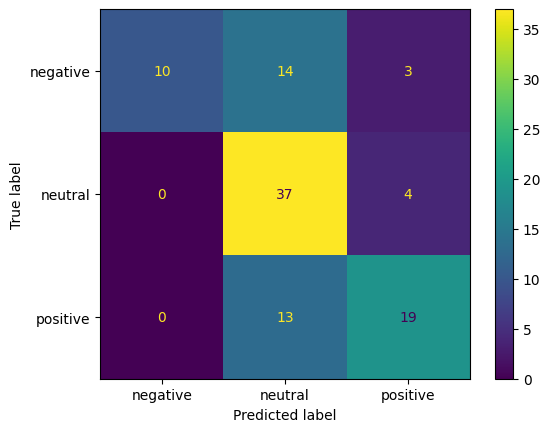

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Therefore, we can conclude that we are more likely to predict the neutral right rather than the other sentiment. We have a 66% accuracy on our data.

So the loss percentage might be from the word day since it was mostly use in neutral and positive so there is a higher chance that instead of positive sentiment the model can predict a neutral sentiment. Same as the neutral and negative, they both share the same word which is the now.

In [49]:
# Predicting the data
final_pipe.fit(X, y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Time of Tweet']),
                                                 ('vectorizer',
                                                  Pipeline(steps=[('vectorizer',
                                                                   TfidfVectorizer())]),
                                                  'text')])),
                ('model', MultinomialNB())])